In [2]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def home():
    return "Hello, World!"
    
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:


with open("plots/AKBNK.E_plot.json","r") as file:
    text=file.read()
    preds_dict=json.loads(text)
x_points=[]
for i in range(11,51):
    x_points.append(pd.to_datetime("2018.07.31 10:{}".format(i)))
x_points

[Timestamp('2018-07-31 10:11:00'),
 Timestamp('2018-07-31 10:12:00'),
 Timestamp('2018-07-31 10:13:00'),
 Timestamp('2018-07-31 10:14:00'),
 Timestamp('2018-07-31 10:15:00'),
 Timestamp('2018-07-31 10:16:00'),
 Timestamp('2018-07-31 10:17:00'),
 Timestamp('2018-07-31 10:18:00'),
 Timestamp('2018-07-31 10:19:00'),
 Timestamp('2018-07-31 10:20:00'),
 Timestamp('2018-07-31 10:21:00'),
 Timestamp('2018-07-31 10:22:00'),
 Timestamp('2018-07-31 10:23:00'),
 Timestamp('2018-07-31 10:24:00'),
 Timestamp('2018-07-31 10:25:00'),
 Timestamp('2018-07-31 10:26:00'),
 Timestamp('2018-07-31 10:27:00'),
 Timestamp('2018-07-31 10:28:00'),
 Timestamp('2018-07-31 10:29:00'),
 Timestamp('2018-07-31 10:30:00'),
 Timestamp('2018-07-31 10:31:00'),
 Timestamp('2018-07-31 10:32:00'),
 Timestamp('2018-07-31 10:33:00'),
 Timestamp('2018-07-31 10:34:00'),
 Timestamp('2018-07-31 10:35:00'),
 Timestamp('2018-07-31 10:36:00'),
 Timestamp('2018-07-31 10:37:00'),
 Timestamp('2018-07-31 10:38:00'),
 Timestamp('2018-07-

In [8]:
pred=preds_dict["prediction"]
truth=preds_dict["truth"]


{'prediction': [4.014581453055143,
  4.1362390369176865,
  4.156225368380547,
  4.156225368380547,
  4.156225368380547,
  4.156225368380547,
  4.23149286210537,
  4.23149286210537,
  4.23149286210537,
  4.23149286210537,
  4.23149286210537,
  4.09607095643878,
  4.23149286210537,
  4.23149286210537,
  4.23149286210537,
  4.23149286210537,
  4.23149286210537,
  4.23149286210537,
  4.23149286210537,
  3.9363534338772297],
 'truth': [5.252100840336159,
  5.621925509487004,
  5.399719495091186,
  5.399719495091186,
  5.4736842105263355,
  5.547752808988783,
  5.325858444288742,
  5.325858444288742,
  5.031446540880533,
  4.811715481171582,
  4.8848569434752465,
  4.81171548117157,
  4.811715481171582,
  4.7386759581881766,
  4.7386759581881766,
  4.520166898470112,
  4.375000000000018,
  4.302567661346306,
  4.302567661346306,
  4.520166898470112,
  4.447533009034067,
  4.375000000000018,
  4.302567661346306,
  4.085872576177309,
  4.15800415800418,
  4.15800415800418,
  4.230235783633862,

Başlangıç Miktarı:31
Aylık Yatırım Miktarı:313131
Yaşınız:3131
Risk Kategoriniz:1


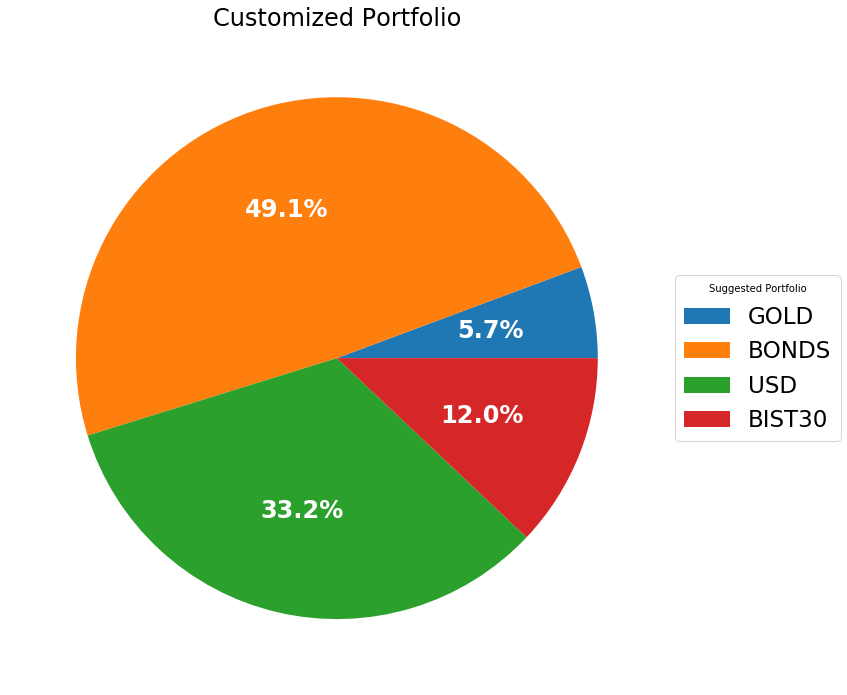

In [18]:
# importing the requests library 
import requests 
%matplotlib inline
url = "https://robodemo.infina.com.tr/robo/api/v0.7L/distribution"
# location given here 
token = '61aa55ad1f9acc25955c4e8c2e3ab7978925c6174b2b03a1a075c3fbfa92cd9d'

start_amount = input("Başlangıç Miktarı:")
monthly_amount = input("Aylık Yatırım Miktarı:")
age = input("Yaşınız:")
risk = input("Risk Kategoriniz:")

import json
import requests
from tqdm import tqdm
import pickle
s = requests.Session()
data = {
        "start_amount": start_amount,
        "monthly_amount": monthly_amount,
        "age" : int(age),
        "risk": risk}

r = s.post(url, json=data, headers = {"X-Client-Token" : token})

json_data = json.loads(r.text)
vals = []
key =['GOLD', 'BONDS', 'USD', 'BIST30']
for i in range(4):
    vals.append(json_data["distribution"][i]["weight"])
    
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24, 12), subplot_kw=dict(aspect="equal"))


data = vals
ingredients = key


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Suggested Portfolio",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          prop={'size': 23})

plt.setp(autotexts, size=24, weight="bold")

ax.set_title("Customized Portfolio",fontdict={'fontsize': 24, 'fontweight': 'medium'})

plt.show()

In [19]:
r.text

'{"error":0,"message":"Success","distribution":[{"assetCode":"GOLD","weight":5.68200},{"assetCode":"BONDS","weight":49.11200},{"assetCode":"USD","weight":33.1600},{"assetCode":"XU030","weight":12.04500}]}'